In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('athlete_events.csv')
region_df=pd.read_csv('noc_regions.csv')


In [3]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [4]:
df.shape

(271116, 15)

In [5]:
df = df[df['Season']=='Summer']
df.shape

(222552, 15)

In [6]:
region_df.tail()

NOC    region        notes
225  YEM     Yemen          NaN
226  YMD     Yemen  South Yemen
227  YUG    Serbia   Yugoslavia
228  ZAM    Zambia          NaN
229  ZIM  Zimbabwe          NaN

In [7]:
df = df.merge(region_df,on='NOC',how='left')


In [8]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN

In [9]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [10]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [11]:
df.duplicated().sum()

1385

In [12]:
df.drop_duplicates(inplace = True)


In [13]:
df.duplicated().sum()

0

In [14]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [15]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [16]:
df.shape


(221167, 20)

In [17]:
df.tail


<bound method NDFrame.tail of             ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

         

In [18]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(25)

NOC  Gold  Silver  Bronze
0   USA  2472    1333    1197
1   URS   832     635     596
2   GBR   635     729     620
3   GER   592     538     649
4   ITA   518     474     454
5   FRA   463     567     587
6   HUN   432     328     363
7   SWE   354     396     358
8   AUS   342     452     510
9   GDR   339     277     227
10  CHN   334     317     258
11  RUS   296     278     331
12  NED   245     302     371
13  JPN   230     287     333
14  NOR   227     196     167
15  DEN   179     236     177
16  KOR   171     206     175
17  CUB   164     129     116
18  ROU   161     200     290
19  CAN   158     239     344
20  FRG   144     172     188
21  FIN   132     125     217
22  IND   131      19      40
23  YUG   130     161      92
24  POL   111     185     242

In [19]:
df[(df['NOC']=='IND') & (df['Medal']=='Gold')]

ID                    Name Sex   Age  Height  Weight   Team  NOC  \
4186      2699             Shaukat Ali   M  30.0     NaN     NaN  India  IND   
4190      2703        Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460      2864     Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461      2864     Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462      2864     Richard James Allen   M  34.0   172.0     NaN  India  IND   
...        ...                     ...  ..   ...     ...     ...    ...  ...   
191759  117232      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  118553  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  118553  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949  125560         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336  133554    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event  \
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN   False  True   False  
4190    Gold  India   NaN   False  True   False  
4460    Gold  India   NaN   False  True   False  
4461    Gold  India   NaN   False  True   False  
4462    Gold  India   NaN   False  True   False  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN   False  True   False  
193964  Gold  India   NaN   False  True   False  
193965  Gold  India   NaN   False  True   False  
205949  Gold  India   NaN   False  True   False  
219336  Gold  India   NaN   False  True   False  

[131 rows x 20 columns]

In [20]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze   Gold  \
0   Basketball Men's Basketball   NaN        China   NaN   False  False   
1  Judo Men's Extra-Lightweight   NaN        China   NaN   False  False   
2       Football Men's Football   NaN      Denmark   NaN   False  False   
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN   False   True   
4  Athletics Women's 100 metres   NaN  Netherlands   NaN   False  False   

   Silver  
0   False  
1   False  
2   False  
3   False  
4   False

## Medal Tally

In [21]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [22]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [23]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [24]:
medal_tally

NOC  Gold  Silver  Bronze  total
0    USA  1035     802     708   2545
1    URS   394     317     294   1005
2    GBR   278     317     300    895
3    GER   235     261     283    779
4    FRA   234     256     287    777
..   ...   ...     ...     ...    ...
225  AHO     0       1       0      1
226  LBR     0       0       0      0
227  LCA     0       0       0      0
228  LES     0       0       0      0
229  LBA     0       0       0      0

[230 rows x 5 columns]

In [25]:
years=df['Year'].unique().tolist()

In [26]:
years.sort()

In [27]:
years.insert(0,'Overall')

In [28]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [29]:
country = np.unique(df['region'].dropna().values).tolist()

In [30]:
country.sort()

In [31]:
country.insert(0,'Overall')

In [32]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [33]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [34]:
def fetch_medal_tally(df,year,country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df 
    if year == 'Overall' and country !='Overall':
        flag = 1
        temp_df = medal_df[medal_df['region']==country]
    if year != 'Overall' and country =='Overall':
       temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country !='Overall':
        temp_df = medal_df[(medal_df['Year'] == 2016) & (medal_df['region']==country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

    x['total'] = x['Gold'] + x ['Silver'] + x['Bronze']

    print(x)

In [35]:
fetch_medal_tally(df, year = 'Overall',country = 'India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


In [36]:
medal_df[(medal_df['Year'] == 2016) & (medal_df['region']=='India')]

ID                      Name Sex   Age  Height  Weight   Team  \
1015       663     Sharath Kamal Achanta   M  34.0   186.0    85.0  India   
7065      4523               Seema Antil   F  33.0   182.0    92.0  India   
8713      5562               Aditi Ashok   F  18.0   173.0    57.0  India   
9202      5868                Manu Attri   M  23.0   172.0    73.0  India   
10070     6427      Lalita Shivaji Babar   F  27.0   166.0    50.0  India   
...        ...                       ...  ..   ...     ...     ...    ...   
182260  111467  Sathish Kumar Sivalingam   M  24.0   175.0    77.0  India   
195568  119515               Shiva Thapa   M  22.0   169.0    56.0  India   
198042  120871             Sandeep Tomar   M  25.0   168.0    61.0  India   
216942  132143       Vikas Krishan Yadav   M  24.0   177.0    69.0  India   
216985  132177      Mohammad Anas Yahiya   M  21.0   177.0    69.0  India   

        NOC        Games  Year  Season            City          Sport  \
1015    IND  2016 Summer  2016  Summer  Rio de Janeiro   Table Tennis   
7065    IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   
8713    IND  2016 Summer  2016  Summer  Rio de Janeiro           Golf   
9202    IND  2016 Summer  2016  Summer  Rio de Janeiro      Badminton   
10070   IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   
...     ...          ...   ...     ...             ...            ...   
182260  IND  2016 Summer  2016  Summer  Rio de Janeiro  Weightlifting   
195568  IND  2016 Summer  2016  Summer  Rio de Janeiro         Boxing   
198042  IND  2016 Summer  2016  Summer  Rio de Janeiro      Wrestling   
216942  IND  2016 Summer  2016  Summer  Rio de Janeiro         Boxing   
216985  IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   

                                              Event Medal region notes  \
1015                     Table Tennis Men's Singles   NaN  India   NaN   
7065                 Athletics Women's Discus Throw   NaN  India   NaN   
8713                        Golf Women's Individual   NaN  India   NaN   
9202                        Badminton Men's Doubles   NaN  India   NaN   
10070   Athletics Women's 3,000 metres Steeplechase   NaN  India   NaN   
...                                             ...   ...    ...   ...   
182260             Weightlifting Men's Middleweight   NaN  India   NaN   
195568                    Boxing Men's Bantamweight   NaN  India   NaN   
198042     Wrestling Men's Featherweight, Freestyle   NaN  India   NaN   
216942                    Boxing Men's Middleweight   NaN  India   NaN   
216985                   Athletics Men's 400 metres   NaN  India   NaN   

        Bronze   Gold  Silver  
1015     False  False   False  
7065     False  False   False  
8713     False  False   False  
9202     False  False   False  
10070    False  False   False  
...        ...    ...     ...  
182260   False  False   False  
195568   False  False   False  
198042   False  False   False  
216942   False  False   False  
216985   False  False   False  

[68 rows x 20 columns]

# Overall Analysis


## 1- No. of Editions


In [37]:
df.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal region  \
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN  China   
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN  China   

  notes  Bronze   Gold  Silver  
0   NaN   False  False   False  
1   NaN   False  False   False

In [38]:
df['Year'].unique().shape[0] -1

28

In [39]:
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

## 2- No. of Cities

In [40]:
df['City'].unique().shape[0] 

23

In [41]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

## 3- No. of Events/Sports

In [42]:
df['Sport'].unique().shape[0] 

52

In [43]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

# 3- No. of Athletes

In [44]:
df['Name'].unique().shape[0] 

116122

# 4- No. of Events

In [45]:
df['Event'].unique().shape[0] 

651

In [46]:
df['Event'].unique() 

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

# 5- Participating Nations

In [47]:
df['region'].unique().shape[0] 

206

In [48]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [49]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze   Gold  \
0   Basketball Men's Basketball   NaN        China   NaN   False  False   
1  Judo Men's Extra-Lightweight   NaN        China   NaN   False  False   
2       Football Men's Football   NaN      Denmark   NaN   False  False   
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN   False   True   
4  Athletics Women's 100 metres   NaN  Netherlands   NaN   False  False   

   Silver  
0   False  
1   False  
2   False  
3   False  
4   False

In [50]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [51]:
nations_over_time

Year  count
28  1896     12
22  1900     31
27  1904     14
26  1906     20
25  1908     22
24  1912     29
23  1920     29
21  1924     45
20  1928     46
19  1932     47
18  1936     49
17  1948     59
16  1952     67
15  1956     71
13  1960     83
11  1964     93
10  1968    111
9   1972    120
12  1976     91
14  1980     80
8   1984    139
7   1988    156
6   1992    168
5   1996    196
4   2000    199
3   2004    200
2   2008    202
1   2012    203
0   2016    204

In [52]:
nations_over_time.rename(columns={'Year' : 'Edition','count' : 'No of Countries'},inplace=True)

In [53]:
import plotly.express as px

In [54]:
fig = px.line(nations_over_time,x= "Edition",y="No of Countries")
fig.show()

In [55]:
x=df.drop_duplicates(['Year','Sport','Event'])

In [56]:
import matplotlib.pyplot as plt


<Axes: xlabel='Year', ylabel='Sport'>

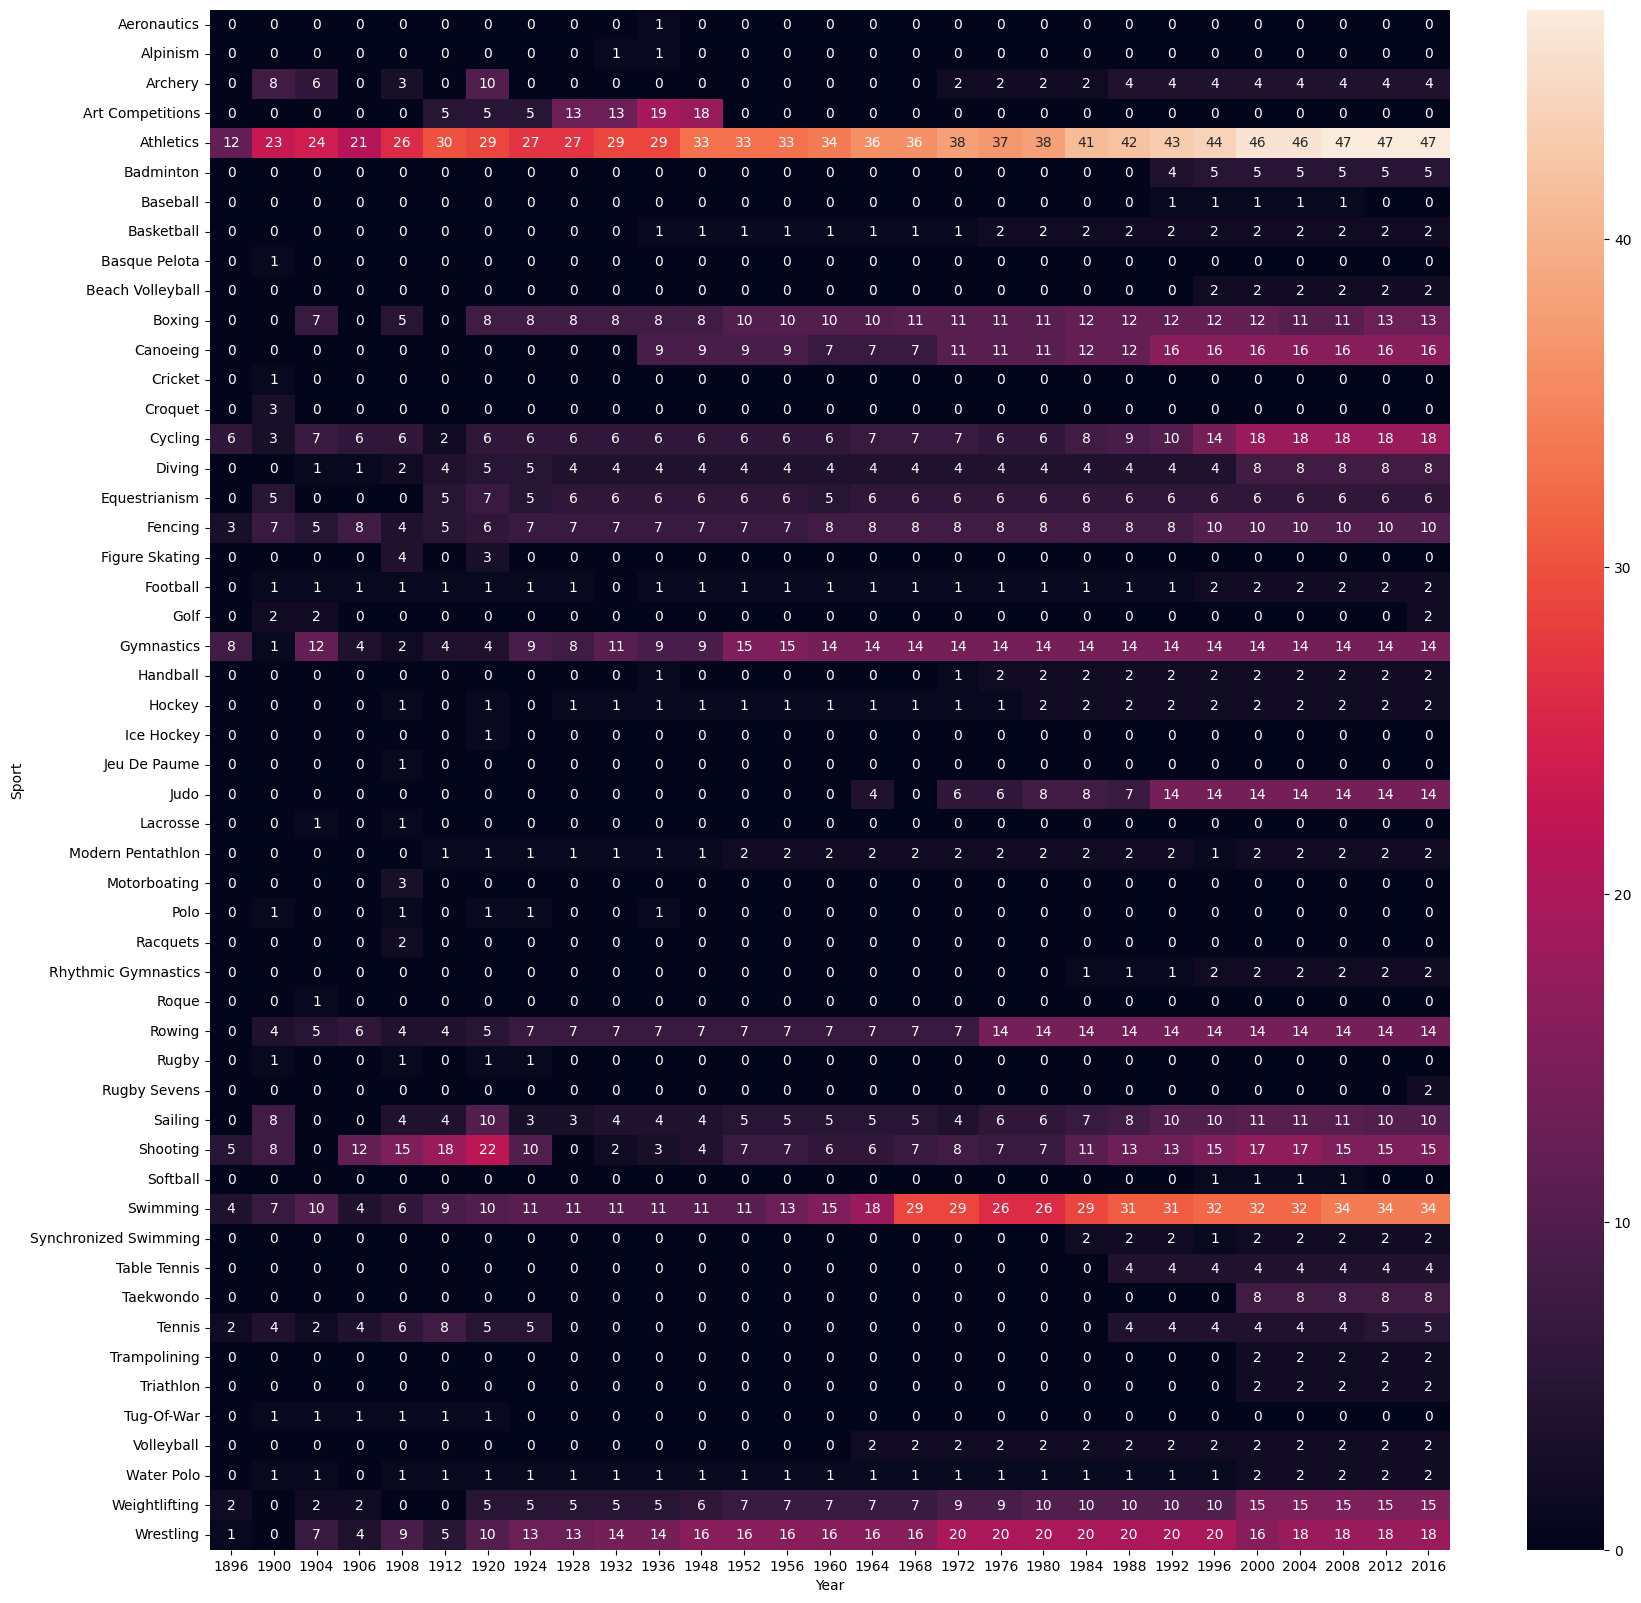

In [57]:
import seaborn as sns
plt.figure(figsize=(20,20))

sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [58]:
df


ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze   Gold  Silver  
0        NaN   False  False   False  
1        NaN   False  False   False  
2        NaN   False  False   False  
3        NaN   False   True   False  
4        NaN   False  False   False  
...      ...     ...    ...     ...  
222547   NaN   False  False   False  
222548   NaN   False  False   False  
222549   NaN   False  False   False  
222550   NaN   False  False   False  
222551   NaN   False  False   False  

[221167 rows x 20 columns]

In [59]:
def most_successful(df,sport):
    temp_df = df.dropna(subset = ['Medal'])

    
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport']== sport]

    x = temp_df['Name'].value_counts().reset_index().head(10).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates('Name')
    x.rename(columns = {'count':'Medals'},inplace = True)
    return x

In [60]:
most_successful(df,'Overall')

Name  Medals       Sport  \
0                            Michael Fred Phelps, II      28    Swimming   
30                Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
49                      Nikolay Yefimovich Andrianov      15  Gymnastics   
73                       Borys Anfiyanovych Shakhlin      13  Gymnastics   
97                                       Takashi Ono      13  Gymnastics   
130                              Edoardo Mangiarotti      13     Fencing   
144             Dara Grace Torres (-Hoffman, -Minas)      12    Swimming   
157                          Aleksey Yuryevich Nemov      12  Gymnastics   
178  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12    Swimming   
195                           Birgit Fischer-Schmidt      12    Canoeing   

      region  
0        USA  
30    Russia  
49    Russia  
73    Russia  
97     Japan  
130    Italy  
144      USA  
157   Russia  
178      USA  
195  Germany

# Country Wise Analysis

## Country wise Medal Tally Per Year(line plot)

In [61]:
temp_df = df.dropna(subset = ['Medal'])
temp_df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_9080\2603984838.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
new_df = temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [63]:
fig = px.line(final_df,x= "Year",y="Medal")
fig.show()

# Which Countries are good at Heatmap

<Axes: xlabel='Year', ylabel='Sport'>

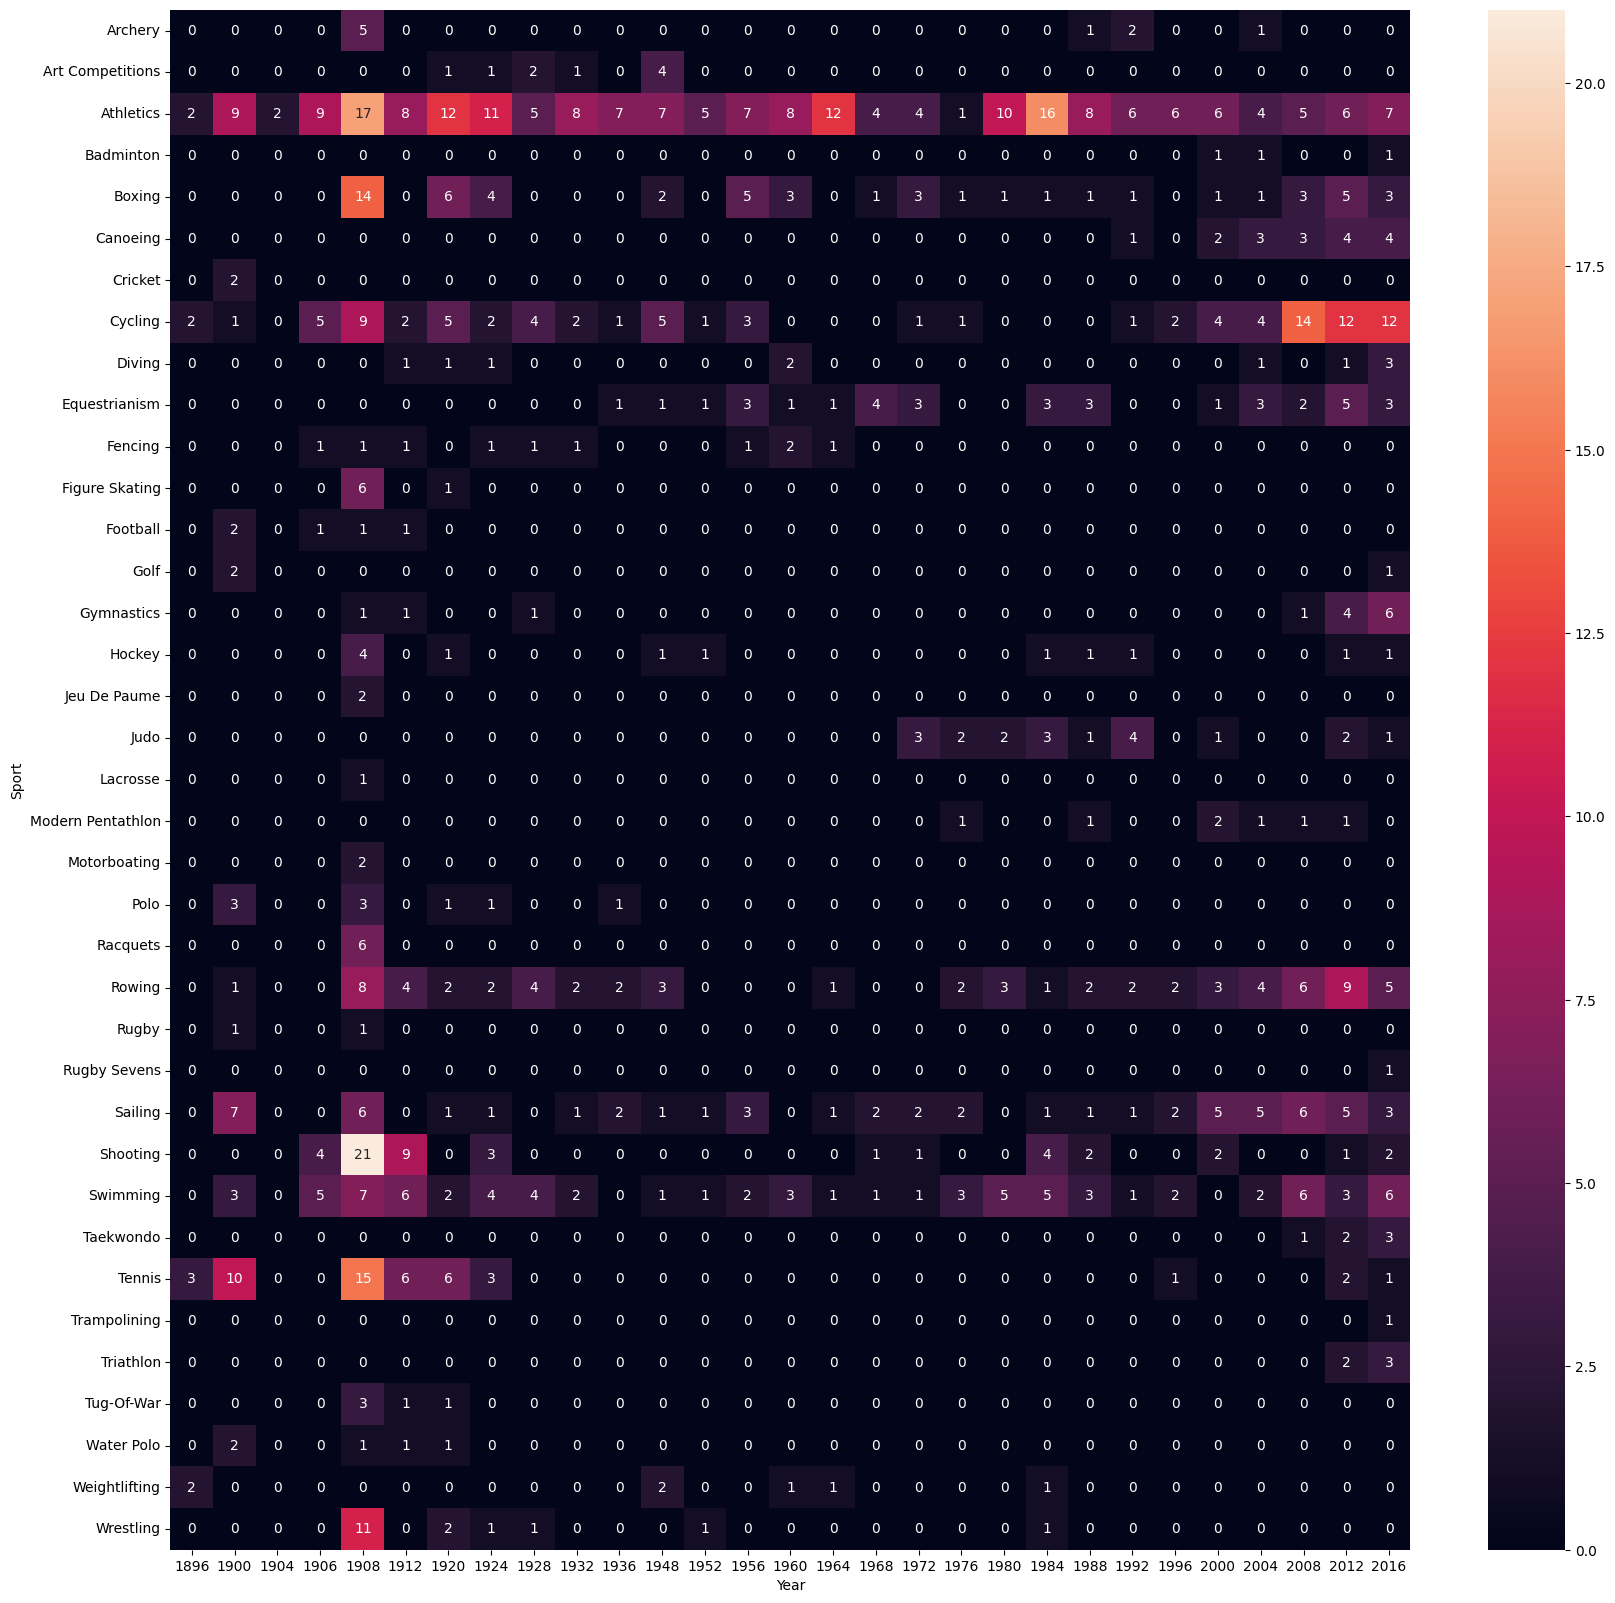

In [64]:
new_df = temp_df[temp_df['region'] == 'UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index = 'Sport',columns ='Year', values='Medal',aggfunc='count').fillna(0),annot=True)

# Most Successful Athletes(Topo 10)

In [65]:
def most_successful(df,country):
    temp_df = df.dropna(subset = ['Medal'])
    temp_df = temp_df[temp_df['region']== country]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport']].drop_duplicates('Name')
    x.rename(columns = {'count':'Medals'},inplace = True)
    return x

In [66]:
most_successful(df,'India')

Name  Medals      Sport
0           Udham Singh Kular       4     Hockey
4      Leslie Walter Claudius       4     Hockey
8       Shankar Pillay Laxman       3     Hockey
11        Ranganathan Francis       3     Hockey
14        Richard James Allen       3     Hockey
17               Balbir Singh       3     Hockey
20     Harbinder Singh Chimni       3     Hockey
23  Balbir Singh Dosanjh, Sr.       3     Hockey
26  Victor John "V. J." Peter       3     Hockey
29           Dhyan Chand Bais       3     Hockey
32            Prithipal Singh       3     Hockey
35       Randhir Singh Gentle       3     Hockey
38            Roop Singh Bais       2     Hockey
40           Hari Pal Kaushik       2     Hockey
42       Sushil Kumar Solanki       2  Wrestling

# Athletes wise Analysis

In [67]:
import plotly.figure_factory as ff

In [68]:
athlete_df = df.drop_duplicates(subset = ['Name','region'])

In [69]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [70]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist = False,show_rug=False)
fig.show()

In [71]:
x =[]
name=[]
famous_sports = [
    'Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
    'Swimming', 'Badminton', 'Sailing', 'Gymnastics', 'Art Competitions',
    'Handball', 'Weightlifting', 'Wrestling', 'Water Polo', 'Hockey',
    'Rowing', 'Fencing', 'Shooting', 'Boxing', 'Taekwondo', 'Cycling',
    'Diving', 'Canoeing', 'Tennis', 'Golf', 'Softball', 'Archery',
    'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
    'Rhythmic Gymnastics', 'Rugby Sevens', 'Beach Volleyball',
    'Triathlon', 'Rugby', 'Polo', 'Ice Hockey'
]
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

In [72]:
fig = ff.create_distplot(x,name,show_hist=False,show_rug=False)

In [73]:
fig.show()

## According Height and Weight

In [74]:
athlete_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222544  135563           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
222546  135565            Fernando scar Zylberberg   M  23.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222544          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222546       Argentina  ARG  2000 Summer  2000  Summer          Sydney   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event   Medal  \
0       Basketball             Basketball Men's Basketball     NaN   
1             Judo            Judo Men's Extra-Lightweight     NaN   
2         Football                 Football Men's Football     NaN   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics            Athletics Women's 100 metres     NaN   
...            ...                                     ...     ...   
222544   Athletics  Athletics Women's 4 x 400 metres Relay  Bronze   
222546      Hockey                     Hockey Men's Hockey     NaN   
222548    Football                 Football Men's Football     NaN   
222549      Rowing  Rowing Men's Lightweight Coxless Fours     NaN   
222551  Basketball           Basketball Women's Basketball     NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
222544       Russia   NaN    True  False   False  
222546    Argentina   NaN   False  False   False  
222548          USA   NaN   False  False   False  
222549       Russia   NaN   False  False   False  
222551      Belarus   NaN   False  False   False  

[116885 rows x 20 columns]

In [75]:
athlete_df['Medal'].fillna('No Medal',inplace= True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_9080\2236847177.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: xlabel='Weight', ylabel='Height'>

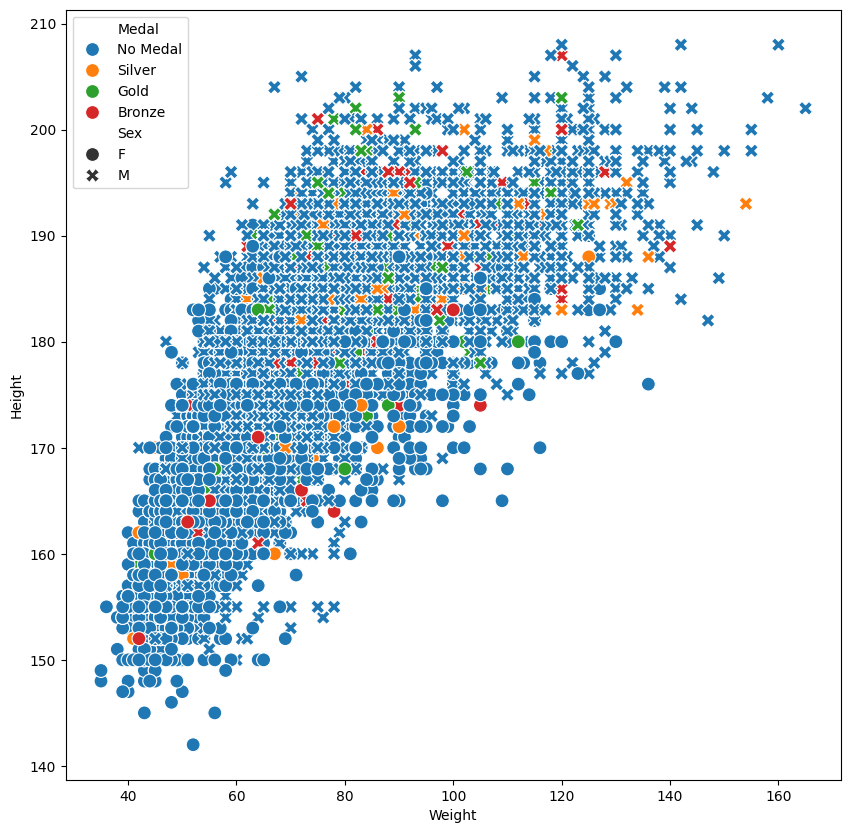

In [76]:
plt.figure(figsize=(10,10))
temp_df=athlete_df[athlete_df['Sport']=='Athletics']
sns.scatterplot(x=temp_df['Weight'],y=temp_df['Height'],hue=temp_df['Medal'],style= temp_df['Sex'],s=100)

In [77]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women =  athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [78]:
final = men.merge(women,on='Year')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)

In [79]:
fig = px.line(final,x="Year",y=["Male","Female"])
fig.show()

## Add data from 2016 to 2024

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


# Load and Preprocess Data

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Preprocessing
df = df[df['Season'] == 'Summer']
X = df[['Age', 'Height', 'Weight']].fillna(0)  # Handle missing values
y = pd.get_dummies(df['Medal']).values  # Convert Medals to one-hot encoded

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [82]:
df[df['NOC'] == 'NOR']

ID                       Name Sex   Age  Height  Weight    Team  \
33          21  Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN  Norway   
35          23                Fritz Aanes   M  22.0   187.0    89.0  Norway   
36          23                Fritz Aanes   M  26.0   187.0    89.0  Norway   
37          25           Alf Lied Aanning   M  24.0     NaN     NaN  Norway   
39          28           Jan-Erik Aarberg   M  43.0   170.0    77.0  Norway   
...        ...                        ...  ..   ...     ...     ...     ...   
215529  131293                Roar Woldum   M  19.0     NaN     NaN  Norway   
218365  133005          Leif Bernhard Yli   M  26.0   183.0    82.0  Norway   
222033  135259      Schirin Zorriasateiny   F  20.0   167.0    55.0  Norway   
222493  135524     Nicolaus "Nic" Zwetnow   M  31.0   181.0    70.0  Norway   
222494  135524     Nicolaus "Nic" Zwetnow   M  35.0   181.0    70.0  Norway   

        NOC        Games  Year  Season         City                Sport  \
33      NOR  2008 Summer  2008  Summer      Beijing             Handball   
35      NOR  2000 Summer  2000  Summer       Sydney            Wrestling   
36      NOR  2004 Summer  2004  Summer       Athina            Wrestling   
37      NOR  1920 Summer  1920  Summer    Antwerpen           Gymnastics   
39      NOR  1968 Summer  1968  Summer  Mexico City              Sailing   
...     ...          ...   ...     ...          ...                  ...   
215529  NOR  1952 Summer  1952  Summer     Helsinki             Swimming   
218365  NOR  1968 Summer  1968  Summer  Mexico City              Cycling   
222033  NOR  1984 Summer  1984  Summer  Los Angeles  Rhythmic Gymnastics   
222493  NOR  1960 Summer  1960  Summer         Roma             Shooting   
222494  NOR  1964 Summer  1964  Summer        Tokyo             Shooting   

                                                 Event   Medal  region notes  \
33                           Handball Women's Handball    Gold  Norway   NaN   
35      Wrestling Men's Light-Heavyweight, Greco-Roman     NaN  Norway   NaN   
36      Wrestling Men's Light-Heavyweight, Greco-Roman     NaN  Norway   NaN   
37       Gymnastics Men's Team All-Around, Free System  Silver  Norway   NaN   
39                 Sailing Mixed Three Person Keelboat     NaN  Norway   NaN   
...                                                ...     ...     ...   ...   
215529           Swimming Men's 1,500 metres Freestyle     NaN  Norway   NaN   
218365    Cycling Men's 100 kilometres Team Time Trial     NaN  Norway   NaN   
222033          Rhythmic Gymnastics Women's Individual     NaN  Norway   NaN   
222493     Shooting Men's Rapid-Fire Pistol, 25 metres     NaN  Norway   NaN   
222494     Shooting Men's Rapid-Fire Pistol, 25 metres     NaN  Norway   NaN   

        Bronze   Gold  Silver  
33       False   True   False  
35       False  False   False  
36       False  False   False  
37       False  False    True  
39       False  False   False  
...        ...    ...     ...  
215529   False  False   False  
218365   False  False   False  
222033   False  False   False  
222493   False  False   False  
222494   False  False   False  

[2592 rows x 20 columns]


# Load Extended dataset (post-2016)

# 1. Data Loading & Preprocessing

In [83]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from lifelines import KaplanMeierFitter
from sklearn.cluster import KMeans
import xgboost as xgb

# Load original datasets
athletes_df = pd.read_csv("athlete_events.csv")
regions_df = pd.read_csv("noc_regions.csv")

# Load your extended dataset (post-2016)
my_data = pd.read_csv("my_dataset.csv")

# Concatenate both athlete datasets
combined_athletes = pd.concat([athletes_df, my_data], ignore_index=True)

# Merge with NOC region data
df = combined_athletes.merge(regions_df, on='NOC', how='left')

# Filter for Summer Olympics
df = df[df['Season'] == 'Summer']


In [84]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1.0                           A Dijiang   M  24.0   180.0    80.0   
1   2.0                            A Lamusi   M  23.0   170.0    60.0   
2   3.0                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4.0                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26  8.0  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

              Team  NOC        Games  Year  ...         City       Sport  \
0            China  CHN  1992 Summer  1992  ...    Barcelona  Basketball   
1            China  CHN  2012 Summer  2012  ...       London        Judo   
2          Denmark  DEN  1920 Summer  1920  ...    Antwerpen    Football   
3   Denmark/Sweden  DEN  1900 Summer  1900  ...        Paris  Tug-Of-War   
26     Netherlands  NED  1932 Summer  1932  ...  Los Angeles   Athletics   

                           Event Medal player_id  Bronze Gold Silver  \
0    Basketball Men's Basketball   NaN       NaN     NaN  NaN    NaN   
1   Judo Men's Extra-Lightweight   NaN       NaN     NaN  NaN    NaN   
2        Football Men's Football   NaN       NaN     NaN  NaN    NaN   
3    Tug-Of-War Men's Tug-Of-War  Gold       NaN     NaN  NaN    NaN   
26  Athletics Women's 100 metres   NaN       NaN     NaN  NaN    NaN   

         region notes  
0         China   NaN  
1         China   NaN  
2       Denmark   NaN  
3       Denmark   NaN  
26  Netherlands   NaN  

[5 rows x 21 columns]

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252565 entries, 0 to 301128
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         222552 non-null  float64
 1   Name       252565 non-null  object 
 2   Sex        252565 non-null  object 
 3   Age        213363 non-null  float64
 4   Height     170695 non-null  float64
 5   Weight     168698 non-null  float64
 6   Team       252565 non-null  object 
 7   NOC        252565 non-null  object 
 8   Games      222552 non-null  object 
 9   Year       252565 non-null  int64  
 10  Season     252565 non-null  object 
 11  City       252565 non-null  object 
 12  Sport      252565 non-null  object 
 13  Event      252565 non-null  object 
 14  Medal      64101 non-null   object 
 15  player_id  30013 non-null   float64
 16  Bronze     30013 non-null   object 
 17  Gold       30013 non-null   object 
 18  Silver     30013 non-null   object 
 19  region     251426 non-null  

In [86]:
df.sample(5)

ID                      Name Sex   Age  Height  Weight  \
90515    45861.0             Erzsbet Hanti   F  15.0   156.0    44.0   
75490    38322.0                Gang Hyeok   M  21.0   181.0    81.0   
142831   71662.0  Thomas Richardson Loudon   M  20.0     NaN     NaN   
18125     9626.0        Allen Charles Bell   M  23.0   178.0    72.0   
206062  103449.0               Norman Rule   M  28.0   172.0    60.0   

                     Team  NOC        Games  Year  ...       City       Sport  \
90515             Hungary  HUN  1980 Summer  1980  ...     Moskva  Gymnastics   
75490         South Korea  KOR  1996 Summer  1996  ...    Atlanta    Baseball   
142831  Toronto Argonauts  CAN  1904 Summer  1904  ...  St. Louis      Rowing   
18125       United States  USA  1956 Summer  1956  ...  Melbourne     Cycling   
206062          Australia  AUS  1956 Summer  1956  ...  Melbourne    Shooting   

                                                    Event   Medal player_id  \
90515                     Gymnastics Women's Balance Beam     NaN       NaN   
75490                             Baseball Men's Baseball     NaN       NaN   
142831                          Rowing Men's Coxed Eights  Silver       NaN   
18125               Cycling Men's 1,000 metres Time Trial     NaN       NaN   
206062  Shooting Men's Small-Bore Rifle, Three Positio...     NaN       NaN   

        Bronze Gold Silver       region notes  
90515      NaN  NaN    NaN      Hungary   NaN  
75490      NaN  NaN    NaN  South Korea   NaN  
142831     NaN  NaN    NaN       Canada   NaN  
18125      NaN  NaN    NaN          USA   NaN  
206062     NaN  NaN    NaN    Australia   NaN  

[5 rows x 21 columns]

In [87]:
df.shape

(252565, 21)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252565 entries, 0 to 301128
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         222552 non-null  float64
 1   Name       252565 non-null  object 
 2   Sex        252565 non-null  object 
 3   Age        213363 non-null  float64
 4   Height     170695 non-null  float64
 5   Weight     168698 non-null  float64
 6   Team       252565 non-null  object 
 7   NOC        252565 non-null  object 
 8   Games      222552 non-null  object 
 9   Year       252565 non-null  int64  
 10  Season     252565 non-null  object 
 11  City       252565 non-null  object 
 12  Sport      252565 non-null  object 
 13  Event      252565 non-null  object 
 14  Medal      64101 non-null   object 
 15  player_id  30013 non-null   float64
 16  Bronze     30013 non-null   object 
 17  Gold       30013 non-null   object 
 18  Silver     30013 non-null   object 
 19  region     251426 non-null  

In [89]:
df.shape

(252565, 21)

# Prediction based on Olympic Data 

#  Medal Prediction

## Predict whether an athlete will win a medal or not (binary classification).

C:\Users\harsh\AppData\Local\Temp\ipykernel_9080\3345217856.py:30: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





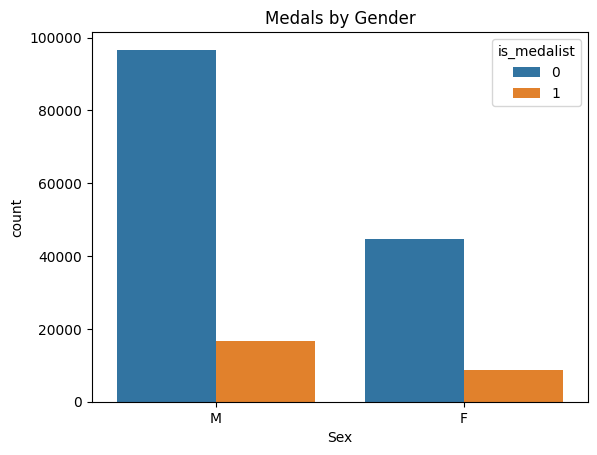

Random Forest - Medal Prediction Accuracy: 0.822086257573031
[[26564  1755]
 [ 4177   846]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     28319
           1       0.33      0.17      0.22      5023

    accuracy                           0.82     33342
   macro avg       0.59      0.55      0.56     33342
weighted avg       0.78      0.82      0.80     33342



C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:34:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost - Medal Prediction Accuracy: 0.8492591926099214
[[28260    59]
 [ 4967    56]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     28319
           1       0.49      0.01      0.02      5023

    accuracy                           0.85     33342
   macro avg       0.67      0.50      0.47     33342
weighted avg       0.80      0.85      0.78     33342



In [90]:

# 1. Data Loading & Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from lifelines import KaplanMeierFitter
from sklearn.cluster import KMeans
import xgboost as xgb

# Load original datasets
# athletes_df = pd.read_csv("athlete_events.csv")
# regions_df = pd.read_csv("noc_regions.csv")

# # Load custom dataset
# my_dataset = pd.read_csv("my_dataset.csv")

# # Merge datasets using 'NOC'
# combined_df = pd.concat([athletes_df, my_dataset], ignore_index=True)
# df = combined_df.merge(regions_df, on='NOC', how='left')

# Filter only Summer Olympics
df = df[df['Season'] == 'Summer']

# 2. Feature Engineering
df['Medal'].fillna('No Medal', inplace=True)
df['is_medalist'] = df['Medal'].apply(lambda x: 0 if x == 'No Medal' else 1)
df.dropna(subset=['Age', 'Height', 'Weight'], inplace=True)
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# Encode categorical variable
le_sport = LabelEncoder()
df['Sport_encoded'] = le_sport.fit_transform(df['Sport'])

# 3. EDA (example plot)
sns.countplot(data=df, x='Sex', hue='is_medalist')
plt.title('Medals by Gender')
plt.show()

# 4. Predictive Modeling
# --- Medal Prediction ---
X = df[['Age', 'Height', 'Weight', 'BMI', 'Sport_encoded']]
y = df['is_medalist']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
print("Random Forest - Medal Prediction Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# XGBoost Classifier
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = model_xgb.predict(X_test_scaled)
print("XGBoost - Medal Prediction Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))






#  Peak Age Prediction

## Predict the athlete's peak performance age (a regression task predicting continuous variable)

In [91]:
# --- Peak Age Prediction ---
medalists = df[df['is_medalist'] == 1]
X_age = medalists[['Height', 'Weight', 'BMI', 'Sport_encoded']]
y_age = medalists['Age']
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train_age, y_train_age)
age_preds = model_lr.predict(X_test_age)
print("Peak Age Prediction RMSE:", np.sqrt(mean_squared_error(y_test_age, age_preds)))





Peak Age Prediction RMSE: 4.922461320373792


In [92]:
# Map medals to numeric scores for ranking performance
medal_rank = {'Gold': 3, 'Silver': 2, 'Bronze': 1, None: 0, np.nan: 0}

# Create a numeric 'Medal_Score' column
df['Medal_Score'] = df['Medal'].map(medal_rank).fillna(0)

# Sort dataframe by athlete, then by Medal_Score (descending), then by Year (ascending)
df_sorted = df.sort_values(by=['Name', 'Medal_Score', 'Year'], ascending=[True, False, True])

# For each athlete, get the row with the highest Medal_Score (peak performance)
peak_performance = df_sorted.groupby('Name').first().reset_index()

# Extract Name and Age at peak performance
peak_ages = peak_performance[['Name', 'Age', 'Medal', 'Year']]

print(peak_ages)


                    Name   Age     Medal  Year
0                 Th Anh  20.0  No Medal  2016
1            Th Ngn Thng  19.0  No Medal  2008
2                Tin Tun  21.0  No Medal  1988
3              A Dijiang  24.0  No Medal  1992
4               A Lamusi  23.0  No Medal  2012
...                  ...   ...       ...   ...
84597  zge Krdar emberci  27.0  No Medal  2012
84598          zlem Kaya  22.0  No Medal  2012
84599         zman Graud  33.0  No Medal  1972
84600         zzet Safer  26.0  No Medal  2016
84601           zzet nce  23.0  No Medal  2004

[84602 rows x 4 columns]


C:\Users\harsh\AppData\Local\Temp\ipykernel_9080\1740504208.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




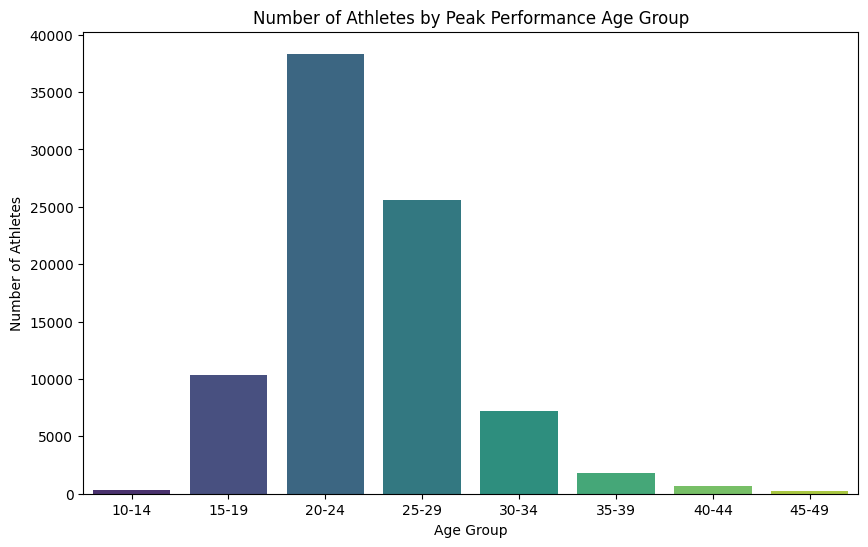

In [93]:
# Map medals to numeric scores (higher is better)
medal_rank = {'Gold': 3, 'Silver': 2, 'Bronze': 1, 'No Medal': 0, None: 0, np.nan: 0}
df['Medal_Score'] = df['Medal'].map(medal_rank).fillna(0)

# Sort by athlete, then by medal score descending, then by Year ascending
df_sorted = df.sort_values(by=['Name', 'Medal_Score', 'Year'], ascending=[True, False, True])

# For each athlete, get their best performance (highest Medal_Score)
peak_performance = df_sorted.groupby('Name').first().reset_index()

# Extract age at peak performance
peak_ages = peak_performance[['Name', 'Age', 'Medal', 'Year']].copy()

# Remove any missing ages (if any)
peak_ages = peak_ages.dropna(subset=['Age'])

# Create age groups (bins) for visualization
bins = [10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']
peak_ages['Age_Group'] = pd.cut(peak_ages['Age'], bins=bins, labels=labels, right=False)

# Count how many athletes peaked in each age group
age_group_counts = peak_ages['Age_Group'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title('Number of Athletes by Peak Performance Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Athletes')
plt.show()


#  Survival Analysis (Athlete Career Longevity)

## Analyze how long athletes tend to stay active in the Olympics (number of years between their first and last appearance)

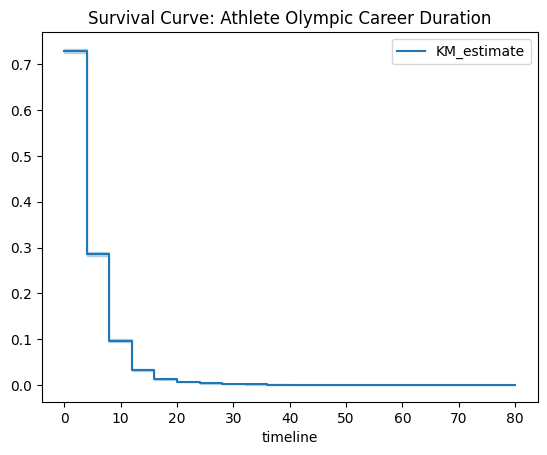

In [94]:
# Survival Analysis
# Athlete longevity (time = number of Olympic appearances)
appearances = df.groupby('Name')['Year'].agg(['min', 'max', 'count']).reset_index()
appearances['duration'] = appearances['max'] - appearances['min']
appearances = appearances[appearances['count'] > 1]

kmf = KaplanMeierFitter()
kmf.fit(durations=appearances['duration'], event_observed=np.ones(len(appearances)))
kmf.plot_survival_function()
plt.title('Survival Curve: Athlete Olympic Career Duration')
plt.show()

#  Clustering Countries by Performance

## Group countries into clusters based on their total Olympic medal counts to identify performance tiers.

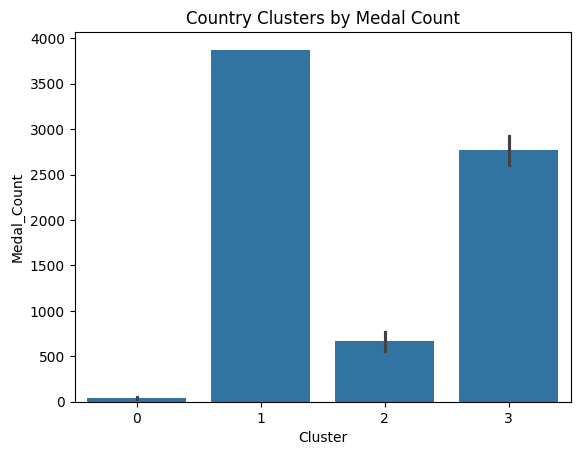

In [95]:
#Clustering Countries by Performance
country_medals = df[df['is_medalist'] == 1].groupby('region')['Medal'].count().reset_index()
country_medals.columns = ['Country', 'Medal_Count']

kmeans = KMeans(n_clusters=4, random_state=42)
country_medals['Cluster'] = kmeans.fit_predict(country_medals[['Medal_Count']])

sns.barplot(data=country_medals, x='Cluster', y='Medal_Count')
plt.title('Country Clusters by Medal Count')
plt.show()

# Host City Prediction Based on Event Patterns with City Names

In [96]:
# Import libraries

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Filter Summer Olympics only
df = df[df['Season'] == 'Summer'].copy()

# Fill missing medals
df['Medal'].fillna('No Medal', inplace=True)

# Drop rows with missing Age/Height/Weight
df.dropna(subset=['Age', 'Height', 'Weight'], inplace=True)

# Add BMI
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# Create binary medalist flag
df['is_medalist'] = df['Medal'].apply(lambda x: 0 if x == 'No Medal' else 1)

# Add medal type counts: gold, silver, bronze
df['is_gold'] = (df['Medal'] == 'Gold').astype(int)
df['is_silver'] = (df['Medal'] == 'Silver').astype(int)
df['is_bronze'] = (df['Medal'] == 'Bronze').astype(int)







C:\Users\harsh\AppData\Local\Temp\ipykernel_9080\637341055.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# Group and aggregate more features per Year-Sport

In [97]:


grouped = df.groupby(['Year', 'Sport']).agg({
    'Sex': lambda x: x.value_counts().idxmax(),  # Most frequent sex
    'Age': 'mean',
    'Height': 'mean',
    'Weight': 'mean',
    'BMI': 'mean',
    'is_medalist': 'sum',
    'is_gold': 'sum',
    'is_silver': 'sum',
    'is_bronze': 'sum',
    'City': lambda x: x.mode().iloc[0],  # Most frequent host city
    'ID': 'count'  # Number of athletes in that year-sport
}).rename(columns={'ID': 'athlete_count'}).reset_index()


In [98]:
#. Encode categorical features
# ------------------------------
le_sex = LabelEncoder()
grouped['Sex_encoded'] = le_sex.fit_transform(grouped['Sex'])

le_sport = LabelEncoder()
grouped['Sport_encoded'] = le_sport.fit_transform(grouped['Sport'])

le_city = LabelEncoder()
grouped['City_encoded'] = le_city.fit_transform(grouped['City'])


In [99]:
#  Prepare features and target
# ------------------------------
features = ['Year', 'Sport_encoded', 'Sex_encoded', 'Age', 'Height', 'Weight', 'BMI',
            'is_medalist', 'is_gold', 'is_silver', 'is_bronze', 'athlete_count']

X = grouped[features]
y = grouped['City_encoded']

# Scale numeric features (except Year which is already numeric but large)
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['Age', 'Height', 'Weight', 'BMI', 'is_medalist', 'is_gold', 'is_silver', 'is_bronze', 'athlete_count']] = \
    scaler.fit_transform(X[[
        'Age', 'Height', 'Weight', 'BMI', 'is_medalist', 'is_gold', 'is_silver', 'is_bronze', 'athlete_count']])


#  Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [100]:
#  Compute class weights to handle imbalance
# ------------------------------
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
weights_dict = dict(zip(classes, class_weights))
sample_weights = y_train.map(weights_dict)



#  Train XGBoost model

In [101]:
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(classes),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6
)

model.fit(X_train, y_train, sample_weight=sample_weights)

# ------------------------------
#  Predict and evaluate
# ------------------------------
y_pred = model.predict(X_test)

print(f"Host City Prediction Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_city.inverse_transform(np.unique(y_test))))

# Show some sample predictions
sample_df = X_test.copy()
sample_df['Actual'] = le_city.inverse_transform(y_test.values)
sample_df['Predicted'] = le_city.inverse_transform(y_pred)
print("\nSample Predictions (Actual vs Predicted Host Cities):")
print(sample_df[['Actual', 'Predicted']].head(15))


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Host City Prediction Accuracy: 0.9835

Classification Report:
                precision    recall  f1-score   support

     Amsterdam       1.00      1.00      1.00         3
     Antwerpen       1.00      1.00      1.00         3
        Athina       1.00      0.89      0.94         9
       Atlanta       1.00      1.00      1.00         6
     Barcelona       1.00      1.00      1.00         6
       Beijing       1.00      1.00      1.00         7
        Berlin       1.00      1.00      1.00         3
      Helsinki       1.00      1.00      1.00         4
        London       1.00      1.00      1.00        13
   Los Angeles       1.00      1.00      1.00         8
     Melbourne       0.75      1.00      0.86         3
   Mexico City       1.00      1.00      1.00         4
      Montreal       1.00      1.00      1.00         5
        Moskva       1.00      1.00      1.00         5
        Munich       1.00      1.00      1.00         5
         Paris       0.83      1.00      

## Predict Athlete Participation Likelihood in Future Olympics

Before resampling: Counter({0: 75635, 1: 22273})
After SMOTE-ENN resampling: Counter({1: 59270, 0: 34242})


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




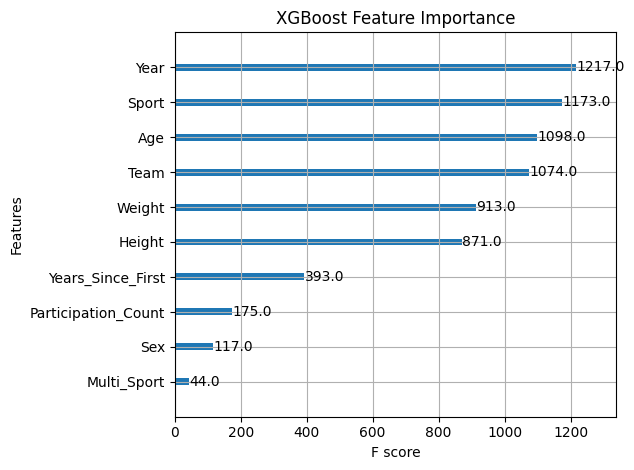

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




🔮 Sample Participation Predictions:
        Actual  Predicted      Prediction_Label
101831       1          0  Will Not Participate
142602       1          1      Will Participate
268929       0          1      Will Participate
200797       0          0  Will Not Participate
59366        0          0  Will Not Participate
223165       0          0  Will Not Participate
154584       0          0  Will Not Participate
5497         0          0  Will Not Participate
37627        0          1      Will Participate
24379        0          0  Will Not Participate

🔍 Classification Report (with SMOTE-ENN):

              precision    recall  f1-score   support

           0       0.89      0.65      0.75     18909
           1       0.38      0.72      0.50      5568

    accuracy                           0.67     24477
   macro avg       0.63      0.69      0.62     24477
weighted avg       0.77      0.67      0.69     24477



In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import matplotlib.pyplot as plt

# Load your dataset (already merged and cleaned)
# df = pd.read_csv("your_combined_dataset.csv")  # If not already loaded

# Drop rows with missing essential values
df = df.dropna(subset=['Name', 'Year'])
df['Year'] = df['Year'].astype(int)
df.sort_values(by=['Name', 'Year'], inplace=True)

# Target: Will_Participate_Again
df['Next_Participation'] = df.groupby('Name')['Year'].shift(-1)
df['Will_Participate_Again'] = (df['Next_Participation'] > df['Year']).astype(int)
df = df.drop_duplicates(subset=['Name', 'Year'])

# Fill missing numeric values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Weight'] = df['Weight'].fillna(df['Weight'].median())

# Binary feature: Medal won
df['Medal_Won'] = df['Medal'].notnull().astype(int)

# Participation count
df['Participation_Count'] = df.groupby('Name').cumcount() + 1

# Years since first Olympic
df['First_Olympic_Year'] = df.groupby('Name')['Year'].transform('min')
df['Years_Since_First'] = df['Year'] - df['First_Olympic_Year']

# Is multi-sport athlete
df['Unique_Sports'] = df.groupby('Name')['Sport'].transform('nunique')
df['Multi_Sport'] = (df['Unique_Sports'] > 1).astype(int)

# Selected features
features = ['Sex', 'Age', 'Height', 'Weight', 'Year', 'Sport', 'Team',
            'Medal_Won', 'Participation_Count', 'Years_Since_First', 'Multi_Sport']
df = df.dropna(subset=features + ['Will_Participate_Again'])

# Encode categorical variables
le_sex = LabelEncoder()
le_sport = LabelEncoder()
le_team = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Sport'] = le_sport.fit_transform(df['Sport'])
df['Team'] = le_team.fit_transform(df['Team'])

# Features and target
X = df[features]
y = df['Will_Participate_Again']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# SMOTE-ENN resampling
from collections import Counter
print("Before resampling:", Counter(y_train))
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)
print("After SMOTE-ENN resampling:", Counter(y_train_resampled))

# XGBoost Classifier
xgb = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_resampled, y_train_resampled)

# Plot top features
plot_importance(xgb, max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

# Voting Ensemble
ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('lr', LogisticRegression(max_iter=1000))
    ],
    voting='soft'
)
ensemble.fit(X_train_resampled, y_train_resampled)

# Prediction
y_pred = ensemble.predict(X_test)

# Results with readable labels
df_test = X_test.copy()
df_test['Actual'] = y_test.values
df_test['Predicted'] = y_pred
df_test['Prediction_Label'] = df_test['Predicted'].apply(lambda x: 'Will Participate' if x == 1 else 'Will Not Participate')

# Print sample predictions
print("\n🔮 Sample Participation Predictions:")
print(df_test[['Actual', 'Predicted', 'Prediction_Label']].head(10))

# Classification Report
print("\n🔍 Classification Report (with SMOTE-ENN):\n")
print(classification_report(y_test, y_pred))
